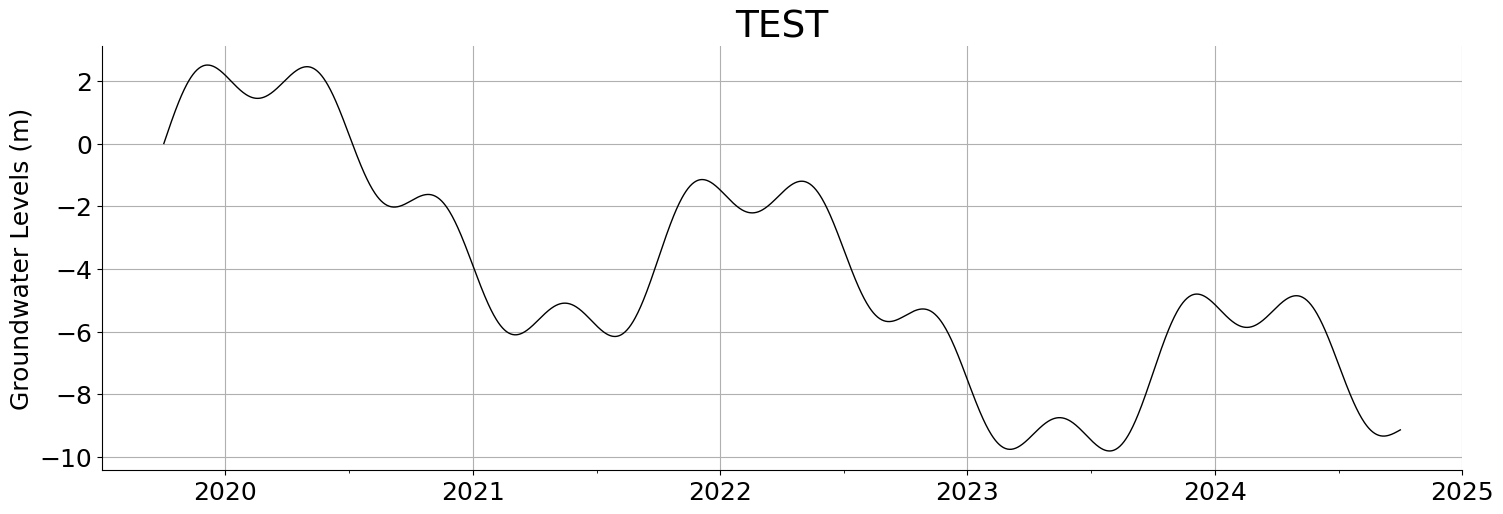

In [179]:
import signaltools
from appgeopy import *
from my_packages import *

min_y = -0.5
max_y = 0.5
# Adjust the scaling factor to fit within the range [-2, 2]
scaling_factor = 2 / max(abs(min_y), abs(max_y))




# amplitudes = np.array([0.25, 0.3, 0.4, 0.5, 1])*5
# periods = [0.1, 0.2, 0.3, 0.4, 1]

amplitudes = [1, 0.5, 3]
periods = [0.5, 1, 2]

signal_df = modeling.synthetic_daily_signal(
    start_date="2020-1-1", end_date="2024-12-31", linear_slope=-0.005, variance=0.0, amplitude_list=amplitudes, period_list=periods
)
signal = signal_df["value"]

# # Define the updated cubic function
# def f_adjusted(x):
#     return scaling_factor * (-4 / (999**3)) * (x - 1) * (x - 500) * (x - 1000)

# # Calculate the new y values
# x = np.arange(len(signal))
# y_adjusted_values = f_adjusted(x)

# y = f(x)
# trend = pd.Series(data=y_adjusted_values, index=signal.index)

signal_w_trend = signal


# Set distance to 3, meaning peaks must be at least 3 days apart
prominence_mag = 10
peaks, _ = scipy.signal.find_peaks(signal_w_trend, prominence=prominence_mag)
troughs, _ = scipy.signal.find_peaks(-signal_w_trend, prominence=prominence_mag)

# Set the figure size and calculate the scaling factor
fig_width, fig_height = visualize.BASE_SIZE
scaling_factor = visualize.calculate_scaling_factor(fig_width, fig_height)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(fig_width * 1.5, fig_height * 2 / 3))

ax.plot(signal_w_trend, linestyle="-", lw=1, color="black")
ax.plot(signal_w_trend[peaks], marker="s", color="green", linestyle=" ")
ax.plot(signal_w_trend[troughs], marker="s", color="red", linestyle=" ")

ax.grid(which="major", axis="y")
# Configure the axis labels, title, and font scaling using visualize.py
visualize.configure_axis(
    ax=ax, xlabel="", ylabel="Groundwater Levels (m)", title="TEST", scaling_factor=scaling_factor
)
# Configure ticks (datetime for x-axis)
visualize.configure_datetime_ticks(ax=ax, axis="x", major_interval=12, minor_interval=6, date_format="%Y")

plt.show()

In [209]:
# Find peaks, calculating prominences and distances
signal = signal_df["value"].values
peaks, _prop = find_peaks(signal, prominence=True)

# peak_prominence = _prop['prominences']
# peak_left = _prop["left_bases"]
# peak_right = _prop["right_bases"]

Text(0.5, 0, 'Index')

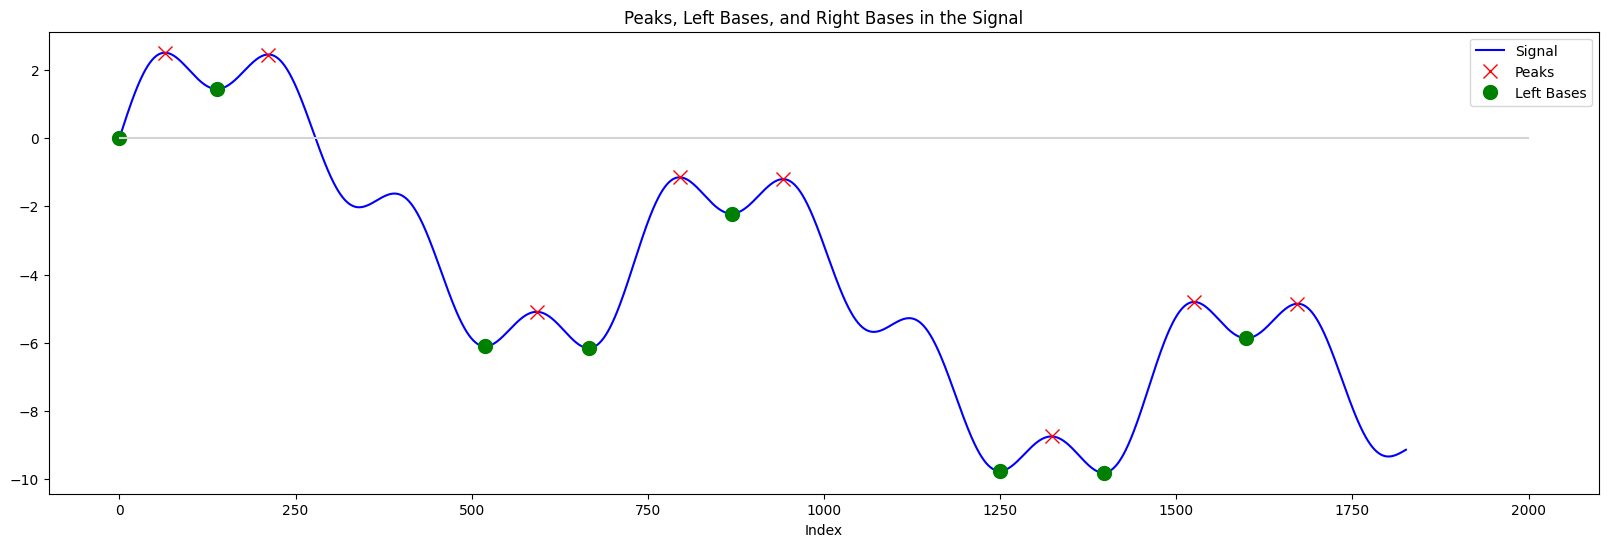

In [210]:
# Plot the signal
plt.figure(figsize=(20, 6))
plt.plot(signal, label='Signal', color='blue')

# Plot the identified peaks
plt.plot(peaks, signal[peaks], 'x', label='Peaks', color='red', markersize=10)

# Plot the left and right bases
plt.plot(_prop["left_bases"], signal[_prop["left_bases"]], 'o', label='Left Bases', color='green', markersize=10)
# plt.plot(_prop["right_bases"], signal[_prop["right_bases"]], 'o', label='Right Bases', color='red', markersize=10)

plt.hlines(y=0, xmin=0, xmax=2000, color='lightgrey')
# Annotate the plot
plt.legend()
plt.title('Peaks, Left Bases, and Right Bases in the Signal')

plt.xlabel('Index')

In [191]:
signal[peaks]

array([ 2.50247375,  2.45000828, -5.09202448, -1.14988349, -1.20241315,
       -8.74456804, -4.80252625, -4.85499172])

In [192]:
peak_prominence

array([2.50247375, 1.01044024, 1.01056237, 5.00523302, 1.01056237,
       1.01044024, 4.5299618 , 1.01044024])

<AxesSubplot: ylabel='Count'>

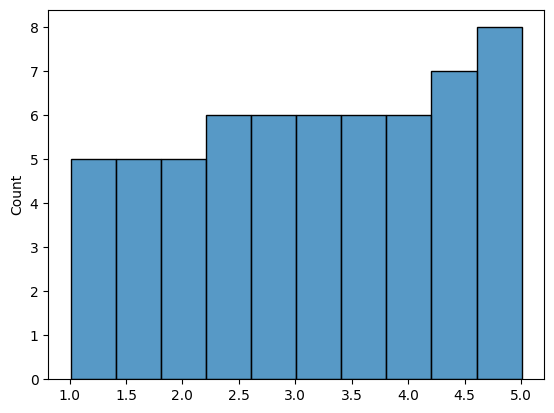

In [195]:
sns.histplot(peak_prominence, cumulative=True, bins=10)

In [196]:
np.quantile(peak_prominence, 0.1)

1.010440236269504